In [17]:
import csv
import lzstring
from collections import namedtuple, Counter
import json
from memoize import memoize
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sys
import json
import matplotlib.pyplot as plt

In [18]:
filepath = 'data/AUG8.csv'
reader = csv.DictReader(open(filepath))

coefficient = {'nothing': 0, 'easy': 1, 'medium': 2, 'hard': 3}



In [19]:
def extract_domain_visit_info(domain_visit_info_compressed):
  domain_visit_info = json.loads(decompressFromEncodedURIComponent(domain_visit_info_compressed))
  output = {}
  for k,v in domain_visit_info.items():
    linedata = domaininfo(*v)
    output[k] = linedata
  return output

In [20]:
csv.field_size_limit(sys.maxsize)

domaininfo = namedtuple('domaininfo', ['num_unique_urls', 'num_unique_urls_typed', 'total_visits', 'total_typed', 'first_visit_time', 'last_visit_time'])
decompressFromEncodedURIComponent = lzstring.LZString().decompressFromEncodedURIComponent

data = []
for item in reader:
    #if item['selected_difficulty'] not in ['nothing', 'easy', 'medium', 'hard']:
    #    continue
    #if item['domain_visit_info_compressed'] == None or len(item['domain_visit_info_compressed']) == 0:
     #   continue
    if int(item['lifetime']) < 1:
        continue
    data.append(item)

In [21]:
print (len(data))

1326


In [22]:
easy_data = []
medium_data = []
hard_data = []
nothing_data = []
optional_data = []
for i in data:
    if i['difficulty_selection_screen'] == 'nochoice_nothing':
        nothing_data.append(i)
    elif i['difficulty_selection_screen'] == 'nochoice_easy':
        easy_data.append(i)
    elif i['difficulty_selection_screen'] == 'nochoice_medium':
        medium_data.append(i)
    elif i['difficulty_selection_screen'] == 'nochoice_hard':
        hard_data.append(i)
    elif i['difficulty_selection_screen'] == 'nodefault_optional':
        optional_data.append(i)

    

In [24]:
print (len(nothing_data))
print ('*************************')
print (len(easy_data))
print ('*************************')
print (len(medium_data))
print ('*************************')
print (len(hard_data))
print ('*************************')
print (len(optional_data))
print (hard_data)

105
*************************
108
*************************
117
*************************
113
*************************
539
[OrderedDict([('userid', 'e6d5069eab29f60c8948f9e6'), ('install_id', 'f0c079040828dce94eaef253'), ('selected_difficulty', 'noneselected'), ('difficulty_selection_screen', 'nochoice_hard'), ('reward_gifs', 'on'), ('goal_notifications', 'on'), ('lifetime_user', '15'), ('attritioned_user', 'false'), ('lifetime', '15'), ('attritioned', 'false'), ('first_active', '16'), ('last_active', '1'), ('first_active_user', '16'), ('last_active_user', '1'), ('onboarding_completed', 'true'), ('last_onboarding_slide_idx', '2'), ('num_install_ids', '1'), ('duplicate_user', 'false'), ('domain_visit_info_compressed', 'N4IgFghgRglgLgG2gOgM5wgOwGYHsBOAJsgKaECuIAXANoDMANAAwMAszDAjAKx0BMdAGwBOJgMGcAHMmF9JXXuNF9uTVn2TdJrALoMQAdyPIA5rlwmEJZAGNcAW2o1OdJpy5dJddu551OnIKswtycrHTSAOx8wgr8QsphAZoJeiD2EDAIpuaW1naOtHLsLJHCghx+AYK83JFBnMisnGJxSm6CfEyCyJwCaTA4uGTImARwYAYk6CT4mKQUTqyRjL6SAR5VAi3q4azId

In [25]:
def get_rettention_curve(users):
    days = 7
    curve = []
    for i in range(days):
        curve.append(0)
    for i in range (len(users)):
        for j in range(min(users[i], days)):
            curve[j] += 1
    return curve

Attrition for random assigned users
Blue : nothing
yellow : easy
orange : medium
red : hard


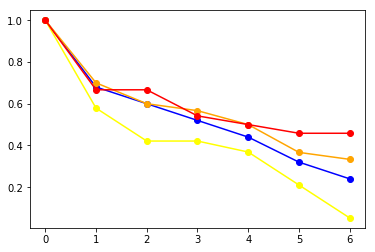

In [26]:
nothing_users = []
easy_users = []
medium_users = []
hard_users = []
a = 7

for i in nothing_data:
    if (int(i['last_active']) > 1):
        nothing_users.append(int(i['lifetime']))

curve = get_rettention_curve(nothing_users)

x = []
temp = curve[0]
for i in range(a):
    curve[i] /= temp
plt.plot(curve, marker='o', color='Blue')

for i in easy_data:
    if (int(i['last_active']) > 1):
        easy_users.append(int(i['lifetime']))

curve = get_rettention_curve(easy_users)

x = []
temp = curve[0]
for i in range(a):
    curve[i] /= temp
plt.plot(curve, marker='o', color='yellow')

for i in medium_data:
    if (int(i['last_active']) > 1):
        medium_users.append(int(i['lifetime']))

curve = get_rettention_curve(medium_users)

x = []
temp = curve[0]
for i in range(a):
    curve[i] /= temp
plt.plot(curve, marker='o', color='Orange')

for i in hard_data:
    if (int(i['last_active']) > 1):
        hard_users.append(int(i['lifetime']))

curve = get_rettention_curve(hard_users)

print ("Attrition for random assigned users")
x = []
temp = curve[0]
for i in range(a):
    curve[i] /= temp
plt.plot(curve, marker='o', color='red')

print ("Blue : nothing")
print ("yellow : easy")
print ("orange : medium")
print ("red : hard")

In [27]:
all_users = []
for i in nothing_data:
    all_users.append(i['userid'])
for i in easy_data:
    all_users.append(i['userid'])
for i in medium_data:
    all_users.append(i['userid'])
for i in hard_data:
    all_users.append(i['userid'])
print (all_users)

['47b44e904f2642693bc75fbc', 'e9d27d965b8ec4998c9a53c3', 'a517c2d69888b58020bcec14', '19833380e1197413780e0a1f', '514fd0a74ae0615323dcb6e1', '700520d350da18f4b69028a6', '4900386ad879fbc3b5537353', 'bc73a7bd0fb96e45432892b4', '863c2e506d14a1f8cc85185c', 'd2eb58fbcd3e84c01adef3ff', 'ae3be0b3f75a37ae9c272326', 'bb4d0d288bfb5a1af49ad1f4', '62113c1dac5b5b25378171ec', 'db3b18768a75ffaf9f11fa93', 'b07c88ee5976c8cc020391ed', 'b4269efd15ece3161535ec87', 'dfabf7e1b58df14fad27c780', '6e8d93e8fb5830a29b5712ec', '2567c0a58a54e5b6ae78f17d', '933d7fff46145aafae44f47b', '276b6ccc4ff6daeced4abc54', 'ba267ca504a49b48992d859e', 'bd3c4126b41e6d84ff0eb06d', '37fcf6d7092880df55bd8706', '49460f735fb97286c4ddd491', '8749326b2534643586ff73bc', '94e38122394b17cbb19f7f3b', '1f59fd36cdd0559f86db0e80', '6b0ca8079e307c6a27abcf88', 'b2781d0a0d8236bb9ba135c7', '7693de0d3fcf2d70bc866c19', '4518cea0685f4081661acaee', '1504d4ed6bb86da1641487af', '56f60ad0b7ff38de792149a0', '540aa11c09e6af5cfd5857f0', 'fd7c42001180f79f3c